In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Bilan tarification 2019.csv', sep=";", encoding="iso-8859-1")
df

,Id Personne,Id Famille,QF,Type repas,Nombre,id gale ou non,type de repas simplifi par tarif identique
0,1,325,999999,Repas Végétarien,2,NaN,Repas vgtarien
1,2,497,636,Repas Standard,1,NaN,Repas Standard
2,3,762,999999,Repas Standard,1,NaN,Repas Standard
3,4,770,392,Repas Standard,125,oui,Repas Standard
4,4,770,999999,Repas Standard,1,NaN,Repas Standard
...,...,...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8,NaN,Repas Standard
16931,15580,10850,999999,Repas Standard,13,NaN,Repas Standard
16932,15581,10851,259,Repas Standard,12,NaN,Repas Standard
16933,15582,10852,620,Repas Standard,14,NaN,Repas Standard


In [3]:
df[['Id Personne', 'Id Famille', 'QF', 'Type repas', 'Nombre']]

,Id Personne,Id Famille,QF,Type repas,Nombre
0,1,325,999999,Repas Végétarien,2
1,2,497,636,Repas Standard,1
2,3,762,999999,Repas Standard,1
3,4,770,392,Repas Standard,125
4,4,770,999999,Repas Standard,1
...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8
16931,15580,10850,999999,Repas Standard,13
16932,15581,10851,259,Repas Standard,12
16933,15582,10852,620,Repas Standard,14


In [4]:
df['Repas'] = np.where(df["Type repas"].str.contains('Végé'),
                       'strasbourg_metropole_nombre_repas_cantine_vegetarien',
                       'strasbourg_metropole_nombre_repas_cantine'
                      )
df

,Id Personne,Id Famille,QF,Type repas,Nombre,id gale ou non,type de repas simplifi par tarif identique,Repas
0,1,325,999999,Repas Végétarien,2,NaN,Repas vgtarien,strasbourg_metropole_nombre_repas_cantine_vege...
1,2,497,636,Repas Standard,1,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
2,3,762,999999,Repas Standard,1,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
3,4,770,392,Repas Standard,125,oui,Repas Standard,strasbourg_metropole_nombre_repas_cantine
4,4,770,999999,Repas Standard,1,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
...,...,...,...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
16931,15580,10850,999999,Repas Standard,13,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
16932,15581,10851,259,Repas Standard,12,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine
16933,15582,10852,620,Repas Standard,14,NaN,Repas Standard,strasbourg_metropole_nombre_repas_cantine


In [5]:
df.QF

0        999999
1           636
2        999999
3           392
4        999999
          ...  
16930    999999
16931    999999
16932       259
16933       620
16934       620
Name: QF, Length: 16935, dtype: int64

In [6]:
np.unique(df.QF)

array([     1,      3,     13, ...,  13591,  13939, 999999])

In [7]:
import matplotlib.pyplot as plt

(array([15859.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1076.]),
 array([1.000000e+00, 1.000008e+05, 2.000006e+05, 3.000004e+05,
        4.000002e+05, 5.000000e+05, 5.999998e+05, 6.999996e+05,
        7.999994e+05, 8.999992e+05, 9.999990e+05]),
 <BarContainer object of 10 artists>)

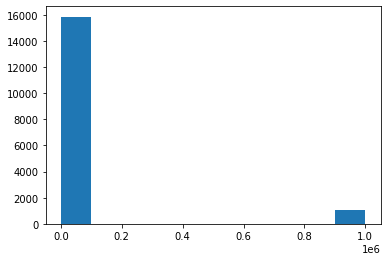

In [8]:
plt.hist(df.QF)

(array([6103., 5395., 2072., 1267.,  536.,  210.,  108.,   50.,   28.,
          31.]),
 array([1.0000e+00, 4.9990e+02, 9.9880e+02, 1.4977e+03, 1.9966e+03,
        2.4955e+03, 2.9944e+03, 3.4933e+03, 3.9922e+03, 4.4911e+03,
        4.9900e+03]),
 <BarContainer object of 10 artists>)

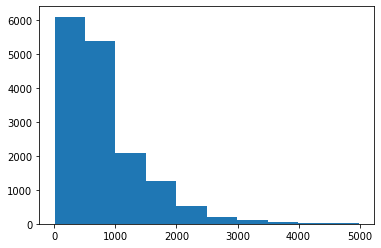

In [9]:
plt.hist(df.QF[df.QF< 5000])

In [10]:
df.QF = np.minimum(df.QF, 99999)

In [12]:
raw_df = pd.pivot_table(df, index=["Id Personne", "Id Famille", "QF"], columns="Repas", values="Nombre", fill_value=0)
raw_df

Repas                         strasbourg_metropole_nombre_repas_cantine  \
Id Personne Id Famille QF                                                 
1           325        99999                                        0.0   
2           497        636                                          1.0   
3           762        99999                                        1.0   
4           770        392                                        125.0   
                       99999                                        1.0   
...                                                                 ...   
15579       10849      99999                                        8.0   
15580       10850      99999                                       13.0   
15581       10851      259                                         12.0   
15582       10852      620                                         14.0   
15583       10852      620                                         10.0   

Repas                         strasbourg_metropole_nombre_repas_cantine_vegetarien  
Id Personne Id Famille QF                                                           
1           325        99999                                                  2     
2           497        636                                                    0     
3           762        99999                                                  0     
4           770        392                                                    0     
                       99999                                                  0     
...                                                                         ...     
15579       10849      99999                                                  0     
15580       10850      99999                                                  0     
15581       10851      259                                                    0     
15582       10852      620                                                    0     
15583       10852      620                                                    0     

[16657 rows x 2 columns]

In [13]:
flat_df = raw_df.reset_index()
flat_df

Repas,Id Personne,Id Famille,QF,strasbourg_metropole_nombre_repas_cantine,strasbourg_metropole_nombre_repas_cantine_vegetarien
0,1,325,99999,0.0,2
1,2,497,636,1.0,0
2,3,762,99999,1.0,0
3,4,770,392,125.0,0
4,4,770,99999,1.0,0
...,...,...,...,...,...
16652,15579,10849,99999,8.0,0
16653,15580,10850,99999,13.0,0
16654,15581,10851,259,12.0,0
16655,15582,10852,620,14.0,0


In [14]:
familles_ids = flat_df["Id Famille"] * 100000 + flat_df.QF

(unique_famille_ids, famille_idx, famille_id_inv) = np.unique(familles_ids, return_index=True, return_inverse=True)
unique_famille_ids, famille_idx, famille_id_inv

(array([    100301,     200455,     300601, ..., 1085099999, 1085100259,
        1085200620], dtype=int64),
 array([14700,  4244,  3271, ..., 16653, 16654, 16655]),
 array([  334,   514,   786, ..., 11608, 11609, 11609]))

In [15]:
individu_df = pd.DataFrame({
    'famille_id': famille_id_inv,
    'strasbourg_metropole_nombre_repas_cantine':flat_df.strasbourg_metropole_nombre_repas_cantine,
    'strasbourg_metropole_nombre_repas_cantine_vegetarien':flat_df.strasbourg_metropole_nombre_repas_cantine_vegetarien,  
})
individu_df

,famille_id,strasbourg_metropole_nombre_repas_cantine,strasbourg_metropole_nombre_repas_cantine_vegetarien
0,334,0.0,2
1,514,1.0,0
2,786,1.0,0
3,794,125.0,0
4,795,1.0,0
...,...,...,...
16652,11606,8.0,0
16653,11607,13.0,0
16654,11608,12.0,0
16655,11609,14.0,0


In [16]:
famille_df = pd.DataFrame({
    'strasbourg_metropole_quotient_familial': flat_df.QF[famille_idx]
})
famille_df

,strasbourg_metropole_quotient_familial
14700,301
4244,455
3271,601
2796,787
12016,244
...,...
16651,99999
7453,99999
16653,99999
16654,259


In [17]:
base_year = "2021-03"

In [19]:
from openfisca_survey_manager.scenarios import AbstractSurveyScenario
from openfisca_france import CountryTaxBenefitSystem
from openfisca_france.model.base import Famille, FoyerFiscal, Menage
from openfisca_core import periods

In [20]:
class StrasbourgSurveyScenario(AbstractSurveyScenario):
    def __init__(self, data = None):
        super(StrasbourgSurveyScenario, self).__init__()

        tax_benefit_system = CountryTaxBenefitSystem()
        tax_benefit_system.load_extension('openfisca_france_local')
        self.year = base_year

        if 'input_data_frame_by_entity_by_period' in data:
            period = periods.period(self.year)
            dataframe_variables = set()
            for entity_dataframe in data['input_data_frame_by_entity_by_period'][period].values():
                if not isinstance(entity_dataframe, pd.DataFrame):
                    continue
                dataframe_variables = dataframe_variables.union(set(entity_dataframe.columns))
            self.used_as_input_variables = list(
                set(tax_benefit_system.variables.keys()).intersection(dataframe_variables)
                )

        self.set_tax_benefit_systems(tax_benefit_system)
        self.init_from_data(data = data)

In [21]:
individu_df['famille_role_index'] = 0
individu_df['foyer_fiscal_id'] = individu_df.famille_id
individu_df['foyer_fiscal_role_index'] = 0
individu_df['menage_id'] = individu_df.famille_id
individu_df['menage_role_index'] = 0

In [22]:
menage_df = pd.DataFrame({})
foyerfiscaux_df = pd.DataFrame({})

In [23]:
periods.period(base_year)

Period(('month', Instant((2021, 3, 1)), 1))

In [24]:
data = dict(input_data_frame_by_entity_by_period = {periods.period(base_year): dict(
individu=individu_df,
famille=famille_df,
menage=menage_df,
foyer_fiscal=foyerfiscaux_df)})

In [25]:
scenario = StrasbourgSurveyScenario(data = data)

In [26]:
tarif_cantine = scenario.simulation.calculate('strasbourg_metropole_tarification_cantine', period = '2021-03')
tarif_cantine

array([1.5 , 2.15, 2.7 , ..., 6.9 , 1.5 , 2.7 ], dtype=float32)

In [27]:
cout_cantine = scenario.simulation.calculate('strasbourg_metropole_cout_cantine', period = '2021-03')
cout_cantine

array([138.      ,  83.850006, 135.      , ...,  89.700005,  18.      ,
        64.8     ], dtype=float32)

In [28]:
sum(cout_cantine)

5426814.293194056

In [29]:
cout_cantine_vege = scenario.simulation.calculate('strasbourg_metropole_cout_cantine_repas_vegetarien', period = '2021-03')
cout_cantine_vege

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
sum(cout_cantine_vege)

187197.99897646904